In [1]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import openai
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import re

In [2]:
df = pd.read_pickle('../data/arxiv_metadata_2022.pkl')
# df['update_date'] = pd.to_datetime(df['update_date'])
df['date'] = pd.to_datetime(df['versions'].apply(lambda x: x[0]['created'])) # converting to datetime takes a while
df = df.drop(columns=['versions', 'update_date'])
df = df.drop_duplicates(subset=['title', 'authors'], keep='first') # replicated submissions
# df['num_versions'] = df['versions'].apply(len)
df['year'] = pd.DatetimeIndex(df['date']).year
def clean_title(s):
    s = s.replace('\n', '')
    s = s.replace('\t', '')
    s = re.sub(' +', ' ', s)
    return s
df['title'] = df['title'].apply(clean_title)
df['title_len'] = df['title'].str.split(' ').apply(len)
df = df[~df['title'].str.lower().str.startswith('comment')]

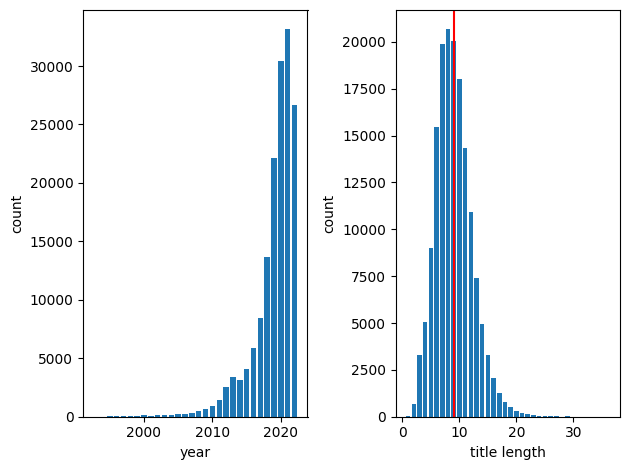

In [3]:
R, C = 1, 2
plt.subplot(R, C, 1)
vals = df.year.value_counts()
plt.bar(x=vals.index, height=vals.values)
plt.xlabel('year')
plt.ylabel('count')

plt.subplot(R, C, 2)
vals = df['title_len'].value_counts()
plt.bar(x=vals.index, height=vals.values)
plt.axvline(np.mean(df.title.str.split(' ').apply(len)), color='r')
plt.xlabel('title length')
plt.ylabel('count')
plt.tight_layout()
plt.show()

In [4]:
title_length_min = 6
title_length_max = 20
df = df[(df.title_len > title_length_min) & (df.title_len < title_length_max)]

In [5]:
date_cutoff = '2022-04-01'

test_frac = 0.1
df_test_recent = df[df.date > date_cutoff]
df_old = df[df.date <= date_cutoff]
rng = np.random.seed(42)
df_train, df_test_old = train_test_split(df_old, test_size=int(df_old.shape[0] * test_frac), random_state=42)
print('all', df.shape, 'train', df_train.shape, 'test recent', df_test_recent.shape, 'test old', df_test_old.shape)

all (124214, 6) train (98388, 6) test recent (14895, 6) test old (10931, 6)


In [6]:
df_train.to_pickle('../data/df_train.pkl')
df_test_old.to_pickle('../data/df_test_old.pkl')
df_test_recent.to_pickle('../data/df_test_recent.pkl')